<a href="https://colab.research.google.com/github/LokiAndere/After_MIARFID/blob/main/checkpoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import keras.backend as BCKN
import matplotlib.pyplot as plt
import numpy as np
import os

In [50]:
pd_path = '/content/drive/My Drive/DefectDetection/pima-indians-diabetes.csv'
dataset = np.loadtxt(pd_path, delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
print(dataset.shape)
print(dataset[:3])

(768, 9)
[[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.      0.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]]


In [51]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
BCKN.clear_session()
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


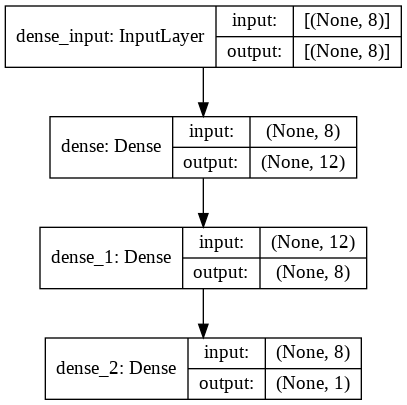

In [52]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [53]:
filepath='/content/drive/My Drive/DefectDetection/weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.64173, saving model to /content/drive/My Drive/DefectDetection/weights.best.h5

Epoch 00002: val_accuracy did not improve from 0.64173

Epoch 00003: val_accuracy did not improve from 0.64173

Epoch 00004: val_accuracy did not improve from 0.64173

Epoch 00005: val_accuracy did not improve from 0.64173

Epoch 00006: val_accuracy did not improve from 0.64173

Epoch 00007: val_accuracy did not improve from 0.64173

Epoch 00008: val_accuracy did not improve from 0.64173

Epoch 00009: val_accuracy did not improve from 0.64173

Epoch 00010: val_accuracy did not improve from 0.64173

Epoch 00011: val_accuracy did not improve from 0.64173

Epoch 00012: val_accuracy did not improve from 0.64173

Epoch 00013: val_accuracy improved from 0.64173 to 0.67323, saving model to /content/drive/My Drive/DefectDetection/weights.best.h5

Epoch 00014: val_accuracy did not improve from 0.67323

Epoch 00015: val_accuracy did not improve from 0.67323

Epoch 00

In [54]:
def print_results(model, scores):
  print(f"{str(model.metrics_names[1])}: {scores[1]*100:.2f}%")

In [55]:
scores = model.evaluate(X, Y, verbose=0)
print_results(model,scores)

accuracy: 76.17%


In [56]:
json_path = '/content/drive/My Drive/DefectDetection/model.json'
model_json = model.to_json()
with open(json_path, 'w') as json_file:
    json_file.write(model_json)

weights_path = '/content/drive/My Drive/DefectDetection/model.h5'
model.save_weights(weights_path)

In [57]:
json_file = open(json_path, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(weights_path)

In [58]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
loaded_score = loaded_model.evaluate(X, Y, verbose=0)
print_results(loaded_model,loaded_score)

accuracy: 76.17%


In [59]:
all_together = '/content/drive/My Drive/DefectDetection/all_in_one_model.h5'
model.save(all_together)

In [68]:
full_loaded_model = load_model(all_together)
BCKN.clear_session()
full_loaded_model.summary()
scoreALLinONE = model.evaluate(X, Y, verbose=0)
print_results(full_loaded_model,scoreALLinONE)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 76.17%


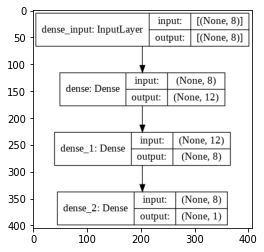

In [75]:
plot_model(model, to_file='/content/drive/My Drive/DefectDetection/model_plot.png', show_shapes=True, show_layer_names=True)
res_pic_array = plt.imread('/content/drive/My Drive/DefectDetection/model_plot.png')
imgplot = plt.imshow(res_pic_array)